In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly 
import plotly.graph_objects as go 
import plotly.offline as pyo
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional
from keras.optimizers import gradient_descent_v2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
sgd = gradient_descent_v2.SGD(...)

In [3]:
import io
from google.colab import files

trainTsv = files.upload()
df = pd.read_csv(io.BytesIO(trainTsv['cropProduction1.csv']))

Saving cropProduction1.csv to cropProduction1.csv


Exploratory Data Analysis

In [4]:
state = pd.pivot_table(df, index = 'State_Name')
state.head()

,Area,Crop_Year,Production
State_Name,,,
Andaman and Nicobar Islands,1649.882118,2005.044335,5662.487512
Andhra Pradesh,12771.385958,2006.116431,84468.558959
Arunachal Pradesh,1663.223095,2005.481540,2655.238743
Assam,4602.577112,2006.370317,12048.486459
Bihar,6781.890972,2005.034101,19067.734840


Total production of crops in each states

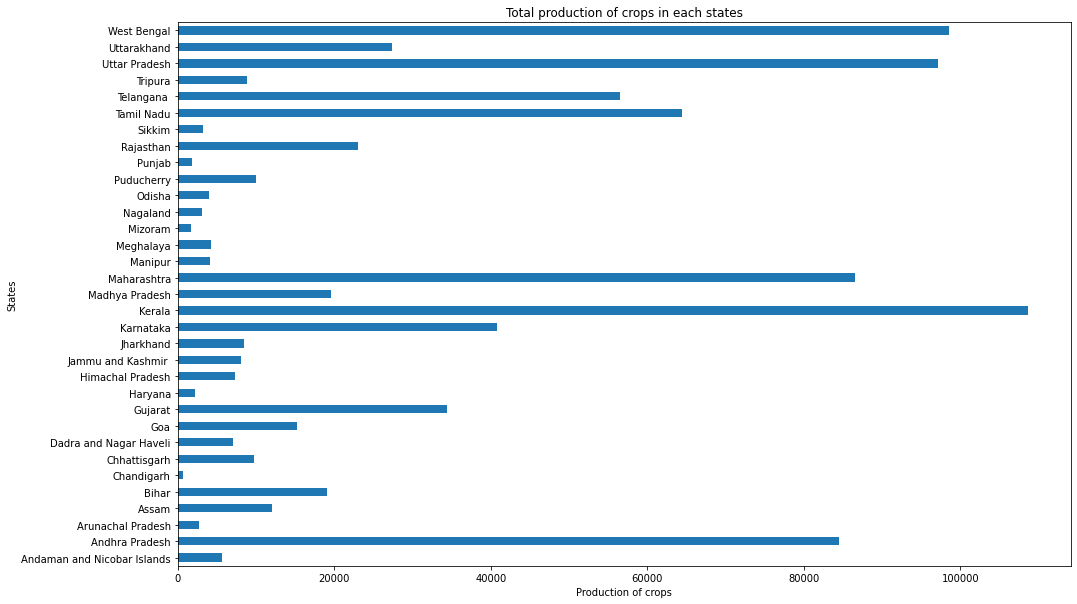

In [5]:
state['Production'].plot(figsize=(16,10),kind='barh' )
plt.xlabel("Production of crops")
plt.ylabel("States")
plt.title('Total production of crops in each states')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



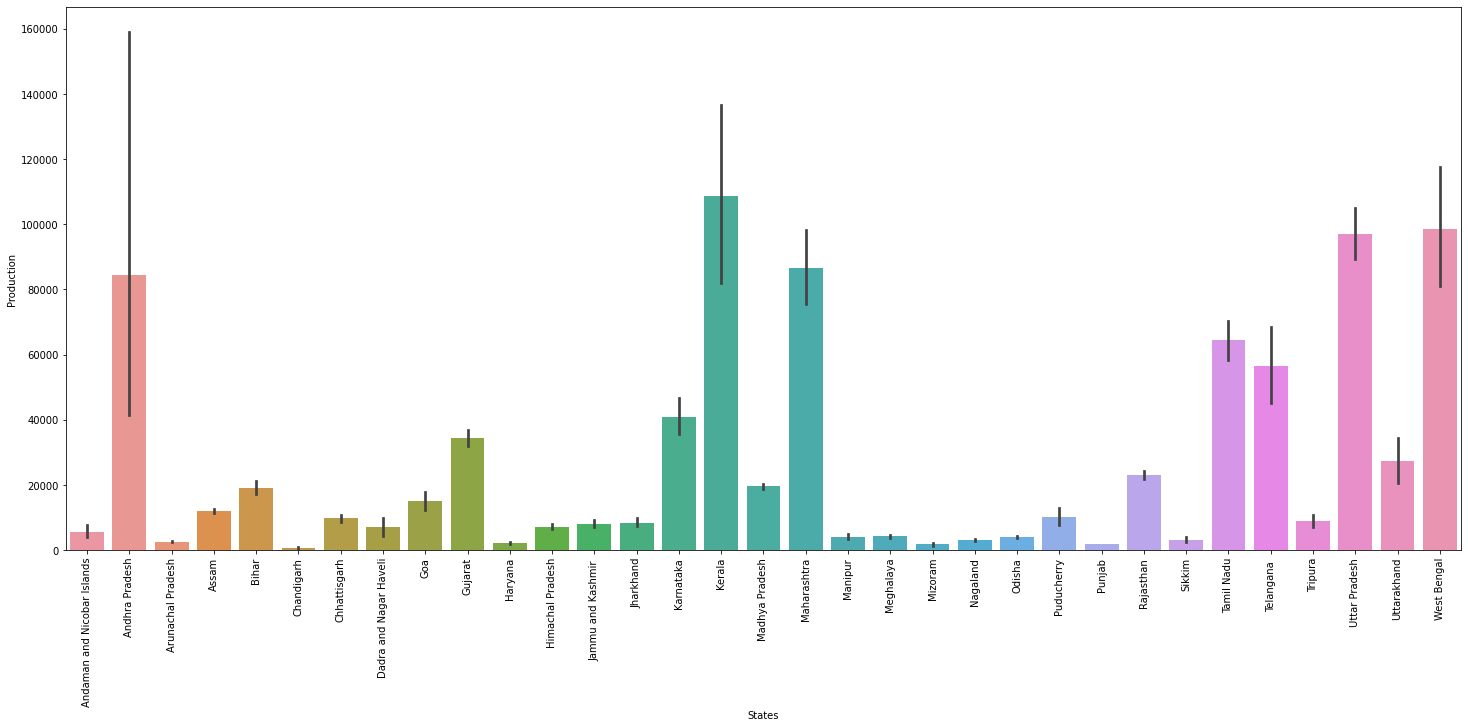

In [6]:
plt.figure(figsize=(25,10))
sns.barplot(df["State_Name"],df["Production"])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.show()

**Conclusion:** It is found that Kerala ranked first while West Bengal ranked second in the production of crops.

**Top 10 states having highest production of crops**

In [7]:
top10_confirmed = pd.DataFrame(state.groupby('State_Name')['Production'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Production', size = 'Production', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 crops producing States')
fig1.show()

**Production of crops per unit area**

In [8]:
temp = df.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production per unit area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production per unit area')
fig = px.bar(temp, 'State_Name', 'Production per unit area', color='Production per unit area',
            title = 'Production of crops per unit area')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**Total production of crops in India every year**

In [9]:
year = pd.pivot_table(df, index = 'Crop_Year')
year.head()

,Area,Production
Crop_Year,,
1997,23451.676143,52267.816370
1998,13323.746813,41882.020420
1999,11421.469117,39111.987276
2000,11351.931249,39227.440309
2001,11232.512138,38766.765787


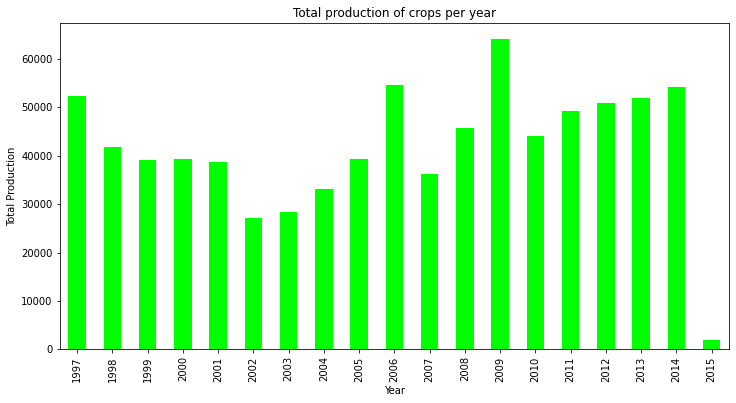

In [10]:
year['Production'].plot.bar(figsize=(12,6),color='lime')
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title('Total production of crops per year')
plt.show()

In [11]:
temp1 = df.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp1, 'Crop_Year', 'Production')

Comparison of crops production wrt the area of states

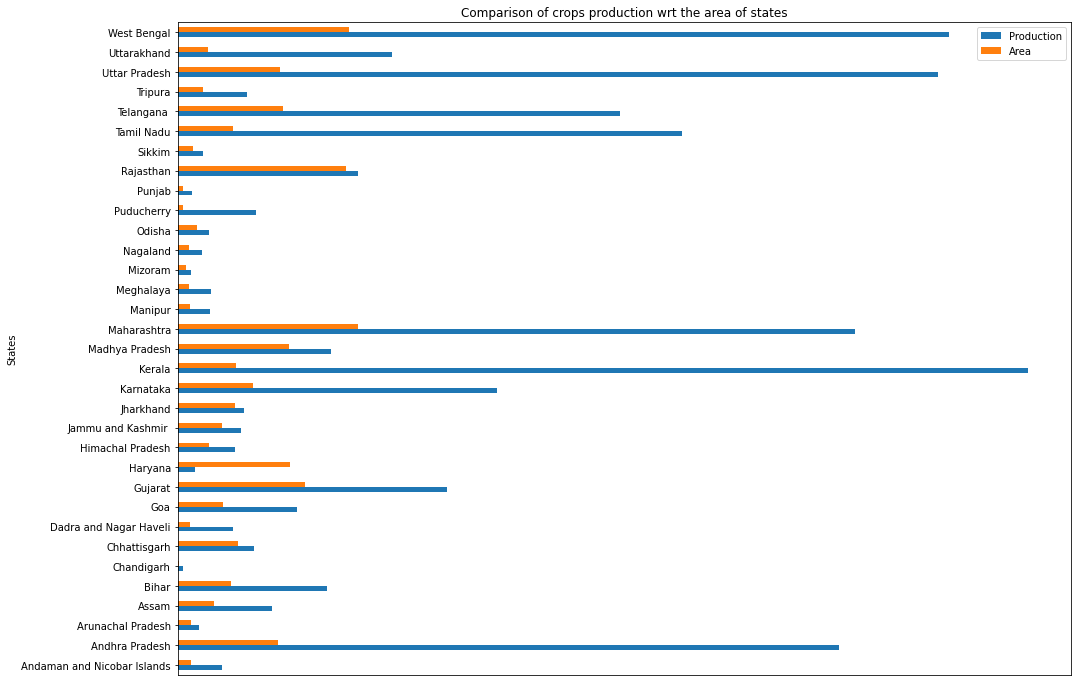

In [12]:
state = state.reset_index()
PRODUCTION = np.array(state['Production'])
AREA = np.array(state['Area'])
anaemicCombined = pd.DataFrame({'Production': PRODUCTION,'Area': AREA}, index=state['State_Name'] )#, figsize=(12,10))
anaemicCombined.plot.barh(figsize=(16,12))
plt.title('Comparison of crops production wrt the area of states')
plt.ylabel("States")
plt.tick_params(bottom=False,labelbottom=False)
plt.show()

**Conclusion:** It is found that Kerala have the highest production of crops inspite having less area.

**Production of crops in each season**

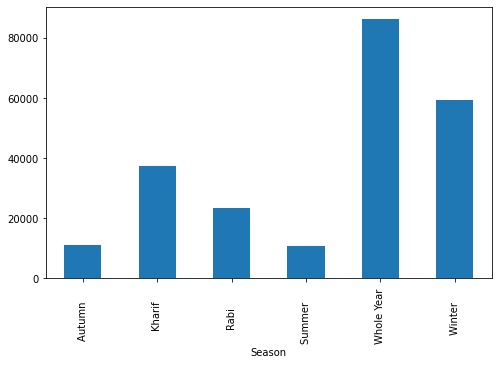

In [13]:
season = pd.pivot_table(df, index = 'Season')
season['Production'].plot(figsize=(8,5),kind='bar' )
plt.xlabel("Season")
plt.show()

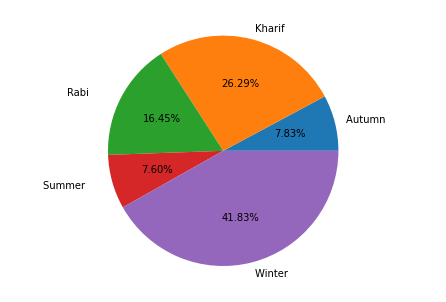

In [14]:
df2 = season['Production']
df2= np.array(df2)
df2 = np.delete(df2, 4)
df3 = season.index
df3= np.array(df3)
df3 = np.delete(df3, 4)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(df2,labels=df3, autopct='%1.2f%%')
plt.show()

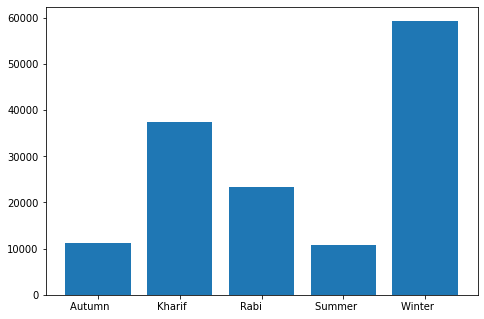

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df3,df2)
plt.show()

**Conclusion:** It is found that winter season has the high production of crops in India.

**Year-wise production of crops**

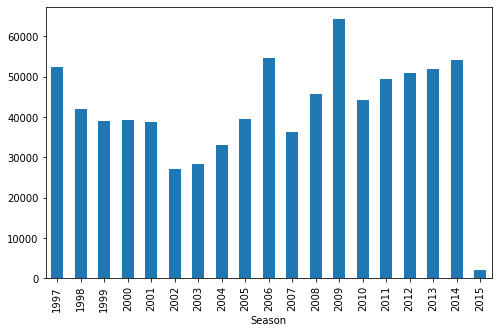

In [16]:
year = pd.pivot_table(df, index = 'Crop_Year')
year['Production'].plot(figsize=(8,5),kind='bar' )
plt.xlabel("Season")
plt.show()

**Conclusion:** It is found that the year 2009 had the highes production of crops.

Time series Analysis

In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional
from keras.optimizers import gradient_descent_v2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [18]:
sgd = gradient_descent_v2.SGD(...)

In [20]:
kerala = df[(df["State_Name"] == "Kerala")]
kerala

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
97987,Kerala,ALAPPUZHA,1997,Whole Year,Arecanut,2253.00,1518.0
97988,Kerala,ALAPPUZHA,1997,Whole Year,Black pepper,2235.00,248.0
97989,Kerala,ALAPPUZHA,1997,Whole Year,Cashewnut,7205.00,2358.0
97990,Kerala,ALAPPUZHA,1997,Whole Year,Coconut,77893.00,3990.0
97991,Kerala,ALAPPUZHA,1997,Whole Year,Tapioca,3911.00,7411.0
...,...,...,...,...,...,...,...
102243,Kerala,WAYANAD,2014,Whole Year,Sugarcane,0.75,NaN
102244,Kerala,WAYANAD,2014,Whole Year,Sweet potato,8.00,127.0
102245,Kerala,WAYANAD,2014,Whole Year,Tapioca,2327.00,99788.0
102246,Kerala,WAYANAD,2014,Whole Year,Turmeric,161.00,481.0


Taking Rice

In [21]:
Rice = df[(df["Crop"] == "Rice")]
Rice["production"] = Rice["Production"]/10000
Rice.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,0.032100
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,0.030000
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,0.051084
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,0.009017
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,0.007257


In [22]:
Rice = kerala[(kerala["Crop"] == "Rice")]
Rice=Rice.reset_index()
Rice = Rice.drop(['index','District_Name','Season','Area'],axis=1)
Rice

,State_Name,Crop_Year,Crop,Production
0,Kerala,1998,Rice,1757.0
1,Kerala,1998,Rice,5801.0
2,Kerala,1998,Rice,16098.0
3,Kerala,1999,Rice,24776.0
4,Kerala,1999,Rice,39718.0
...,...,...,...,...
690,Kerala,2012,Rice,25287.0
691,Kerala,2013,Rice,4062.0
692,Kerala,2013,Rice,26693.0
693,Kerala,2014,Rice,2844.0


In [23]:
Rice_pivot = pd.pivot_table(Rice, index = 'Crop_Year')
Rice_pivot

,Production
Crop_Year,
1998,16467.950000
1999,18797.219512
2000,18325.073171
2001,17158.634146
2002,16801.439024
2003,14251.125000
2004,16517.358974
2005,15365.536585
2006,15648.170732


In [24]:
# Reshape the dataset 
ddf1 = np.array(Rice_pivot).reshape(-1 , 1)
ddf1

array([[16467.95      ],
       [18797.2195122 ],
       [18325.07317073],
       [17158.63414634],
       [16801.43902439],
       [14251.125     ],
       [16517.35897436],
       [15365.53658537],
       [15648.17073171],
       [12889.95121951],
       [14396.12195122],
       [14593.63414634],
       [12749.7097561 ],
       [13877.8897561 ],
       [12397.53658537],
       [13764.02439024],
       [13709.56097561]])

In [25]:
# split the data into train and test data
trainSize = int(len(ddf1)*0.67)
testSize = len(ddf1) - trainSize
trainData , testData = ddf1[0:trainSize , : ] , ddf1[trainSize : len(ddf1),:1]

In [26]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [27]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(3, 11):
    xTrain.append(trainData[i-3 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [28]:
#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [29]:
# LSTM Architecture
model = Sequential()

#first layer with Drouput Regularsation
model.add(LSTM(units=50 , return_sequences=True , input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

#Second LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units=1))

In [30]:
model.compile(optimizer = 'rmsprop' , loss='mean_squared_error')

In [31]:
#Fitting to the traing set
model.fit(xTrain , yTrain , epochs = 50 , batch_size = 5)

Epoch 1/50
2/2 [==============================] - 8s 17ms/step - loss: 0.2198
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 0.1784
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 0.1340
Epoch 4/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0858
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0603
Epoch 6/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0497
Epoch 7/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0542
Epoch 8/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0347
Epoch 9/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0452
Epoch 10/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0488
Epoch 11/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0479
Epoch 12/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0516
Epoch 13/50
2/2 [==============================] - 0s 14ms/st

In [32]:
dataset_total = (Rice["Production"])
inputs = dataset_total[len(dataset_total)-len(testData) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]

array([[0.83081494],
       [0.03288825],
       [0.71920846],
       [0.        ],
       [0.94124039]])

In [33]:
inputs.shape

(9, 1)

In [34]:
inputs

array([[0.83081494],
       [0.03288825],
       [0.71920846],
       [0.        ],
       [0.94124039],
       [0.05420428],
       [1.        ],
       [0.00330157],
       [0.85920261]])

In [35]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(3, 9):
    xTest.append(inputs[i-3 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)
#testData2 = scaler.inverse_transform(testData)

In [36]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

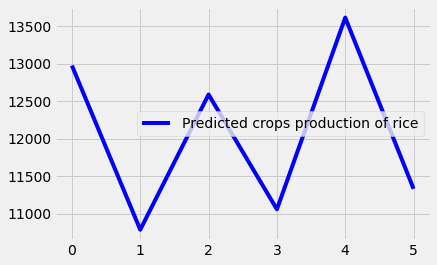

In [37]:
#plt.plot(testData, color='red',label='Real crops production')
plt.plot(predicted_stock_price2, color='blue',label='Predicted crops production of rice')
plt.xlabel = 'Time'
plt.ylabel = 'Crops production'
plt.legend()
plt.show()

Taking Arecanut

In [38]:
Arecanut = df[(df["Crop"] == "Arecanut")]
Arecanut["production"] = Arecanut["Production"]/10000
Arecanut

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,20.00,0.002000
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.00,0.206100
19,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Arecanut,1258.0,2083.00,0.208300
28,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Arecanut,1261.0,1525.00,0.152500
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.7,805.85,0.080585
...,...,...,...,...,...,...,...,...
245183,West Bengal,NADIA,2006,Whole Year,Arecanut,365.0,1010.00,0.101000
245222,West Bengal,NADIA,2007,Whole Year,Arecanut,358.0,982.00,0.098200
245257,West Bengal,NADIA,2008,Whole Year,Arecanut,358.0,982.00,0.098200
245686,West Bengal,PURULIA,2003,Whole Year,Arecanut,2.0,2.00,0.000200


In [39]:
Arecanut = kerala[(kerala["Crop"] == "Arecanut")]
Arecanut=Arecanut.reset_index()
Arecanut = Arecanut.drop(['index','District_Name','Season','Area'],axis=1)
Arecanut

,State_Name,Crop_Year,Crop,Production
0,Kerala,1997,Arecanut,1518.00
1,Kerala,1998,Arecanut,766.00
2,Kerala,1999,Arecanut,1043.00
3,Kerala,2000,Arecanut,917.00
4,Kerala,2001,Arecanut,792.00
...,...,...,...,...
247,Kerala,2010,Arecanut,7061.85
248,Kerala,2011,Arecanut,6078.91
249,Kerala,2012,Arecanut,5796.00
250,Kerala,2013,Arecanut,3985.00


In [40]:
Arecanut_pivot = pd.pivot_table(Arecanut, index = 'Crop_Year')
Arecanut_pivot

,Production
Crop_Year,
1997,6713.928571
1998,4891.357143
1999,5952.642857
2000,6281.928571
2001,6048.500000
2002,7662.785714
2003,7535.000000
2004,7881.571429
2005,8522.071429


In [41]:
# Reshape the dataset 
ddf1 = np.array(Arecanut_pivot).reshape(-1 , 1)
ddf1

array([[6713.92857143],
       [4891.35714286],
       [5952.64285714],
       [6281.92857143],
       [6048.5       ],
       [7662.78571429],
       [7535.        ],
       [7881.57142857],
       [8522.07142857],
       [7854.85714286],
       [8192.14285714],
       [8975.28571429],
       [8340.21428571],
       [7136.39357143],
       [8687.38142857],
       [8445.21428571],
       [7144.14285714],
       [8994.71428571]])

In [42]:
# split the data into train and test data
trainSize = int(len(ddf1)*0.67)
testSize = len(ddf1) - trainSize
trainData , testData = ddf1[0:trainSize , : ] , ddf1[trainSize : len(ddf1),:1]

In [43]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [44]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(3, 11):
    xTrain.append(trainData[i-3 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [45]:
#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [46]:
# LSTM Architecture
model = Sequential()

#first layer with Drouput Regularsation
model.add(LSTM(units=50 , return_sequences=True , input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

#Second LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units=1))

In [47]:
model.compile(optimizer = 'rmsprop' , loss='mean_squared_error')

In [48]:
#Fitting to the traing set
model.fit(xTrain , yTrain , epochs = 50 , batch_size = 5)

Epoch 1/50
2/2 [==============================] - 7s 18ms/step - loss: 0.4363
Epoch 2/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3752
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 0.3028
Epoch 4/50
2/2 [==============================] - 0s 15ms/step - loss: 0.2191
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 0.1088
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0479
Epoch 7/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0282
Epoch 8/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0319
Epoch 9/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0241
Epoch 10/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0160
Epoch 11/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0253
Epoch 12/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0242
Epoch 13/50
2/2 [==============================] - 0s 16ms/st

In [49]:
dataset_total = (Arecanut["Production"])
inputs = dataset_total[len(dataset_total)-len(testData) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]

array([[0.5304126 ],
       [0.20865496],
       [0.49823683],
       [0.45501081],
       [1.        ]])

In [50]:
inputs

array([[0.5304126 ],
       [0.20865496],
       [0.49823683],
       [0.45501081],
       [1.        ],
       [0.68053691],
       [0.58858898],
       [0.        ],
       [0.6779661 ]])

In [51]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(3, 9):
    xTest.append(inputs[i-3 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)
#testData2 = scaler.inverse_transform(testData)

In [52]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

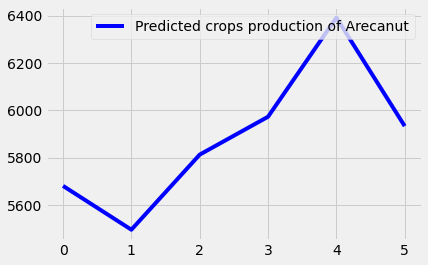

In [53]:
#plt.plot(testData, color='red',label='Real crops production')
plt.plot(predicted_stock_price2, color='blue',label='Predicted crops production of Arecanut')
plt.xlabel = 'Time'
plt.ylabel = 'Crops production'
plt.legend()
plt.show()

Taking Tapioca

In [54]:
Tapioca = df[(df["Crop"] == "Tapioca")]
Tapioca["production"] = Tapioca["Production"]/10000
Tapioca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.00,169.0,0.0169
62,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Tapioca,52.03,450.0,0.0450
78,Andaman and Nicobar Islands,NICOBARS,2010,Whole Year,Tapioca,69.00,575.0,0.0575
89,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Whole Year,Tapioca,160.00,2108.0,0.2108
109,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Whole Year,Tapioca,255.00,1420.0,0.1420
...,...,...,...,...,...,...,...,...
192941,Telangana,KHAMMAM,2010,Whole Year,Tapioca,2.00,13.0,0.0013
193181,Telangana,MAHBUBNAGAR,2000,Whole Year,Tapioca,1.00,8.0,0.0008
195730,Telangana,RANGAREDDI,2000,Whole Year,Tapioca,60.00,459.0,0.0459
195833,Telangana,RANGAREDDI,2002,Whole Year,Tapioca,9.00,0.0,0.0000


In [55]:
Tapioca = kerala[(kerala["Crop"] == "Tapioca")]
Tapioca=Tapioca.reset_index()
Tapioca = Tapioca.drop(['index','District_Name','Season','Area'],axis=1)
Tapioca

,State_Name,Crop_Year,Crop,Production
0,Kerala,1997,Tapioca,7411.00
1,Kerala,1998,Tapioca,86808.00
2,Kerala,1999,Tapioca,90552.00
3,Kerala,2000,Tapioca,81313.00
4,Kerala,2001,Tapioca,72694.00
...,...,...,...,...
247,Kerala,2010,Tapioca,118922.98
248,Kerala,2011,Tapioca,117195.55
249,Kerala,2012,Tapioca,95950.00
250,Kerala,2013,Tapioca,55172.00


In [56]:
Tapioca_pivot = pd.pivot_table(Tapioca, index = 'Crop_Year')
Tapioca_pivot

,Production
Crop_Year,
1997,198222.857143
1998,774550.142857
1999,175394.076923
2000,178445.461538
2001,144898.583333
2002,155439.000000
2003,187552.384615
2004,171431.642857
2005,183448.857143


In [57]:
# Reshape the dataset 
ddf1 = np.array(Tapioca_pivot).reshape(-1 , 1)
ddf1

array([[198222.85714286],
       [774550.14285714],
       [175394.07692308],
       [178445.46153846],
       [144898.58333333],
       [155439.        ],
       [187552.38461538],
       [171431.64285714],
       [183448.85714286],
       [179928.5       ],
       [182603.92857143],
       [193722.42857143],
       [180384.57142857],
       [172068.69      ],
       [181957.04571429],
       [175608.21428571],
       [176647.85714286],
       [210279.92857143]])

In [58]:
# split the data into train and test data
trainSize = int(len(ddf1)*0.67)
testSize = len(ddf1) - trainSize
trainData , testData = ddf1[0:trainSize , : ] , ddf1[trainSize : len(ddf1),:1]

In [59]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [60]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(3, 11):
    xTrain.append(trainData[i-3 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [61]:
#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [62]:
# LSTM Architecture
model = Sequential()

#first layer with Drouput Regularsation
model.add(LSTM(units=50 , return_sequences=True , input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

#Second LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units=1))

In [63]:
model.compile(optimizer = 'rmsprop' , loss='mean_squared_error')

In [64]:
#Fitting to the traing set
model.fit(xTrain , yTrain , epochs = 50 , batch_size = 5)

Epoch 1/50
2/2 [==============================] - 8s 16ms/step - loss: 0.0020
Epoch 2/50
2/2 [==============================] - 0s 16ms/step - loss: 6.8059e-04
Epoch 3/50
2/2 [==============================] - 0s 15ms/step - loss: 6.0989e-04
Epoch 4/50
2/2 [==============================] - 0s 14ms/step - loss: 7.3816e-04
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 5.6160e-04
Epoch 6/50
2/2 [==============================] - 0s 20ms/step - loss: 5.0956e-04
Epoch 7/50
2/2 [==============================] - 0s 14ms/step - loss: 5.4376e-04
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 4.7217e-04
Epoch 9/50
2/2 [==============================] - 0s 14ms/step - loss: 6.0168e-04
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: 4.8327e-04
Epoch 11/50
2/2 [==============================] - 0s 14ms/step - loss: 4.8230e-04
Epoch 12/50
2/2 [==============================] - 0s 14ms/step - loss: 5.5321e-04
Epoch 13/50
2/2 [

In [65]:
dataset_total = (Tapioca["Production"])
inputs = dataset_total[len(dataset_total)-len(testData) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]

array([[0.61417095],
       [0.6332138 ],
       [0.62204534],
       [0.39914681],
       [1.        ]])

In [66]:
inputs

array([[0.61417095],
       [0.6332138 ],
       [0.62204534],
       [0.39914681],
       [1.        ],
       [0.97290348],
       [0.63964507],
       [0.        ],
       [0.69984807]])

In [67]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(3, 9):
    xTest.append(inputs[i-3 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)
#testData2 = scaler.inverse_transform(testData)

In [68]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

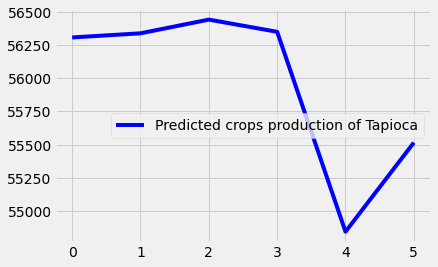

In [69]:
#plt.plot(testData, color='red',label='Real crops production')
plt.plot(predicted_stock_price2, color='blue',label='Predicted crops production of Tapioca')
plt.xlabel = 'Time'
plt.ylabel = 'Crops production'
plt.legend()
plt.show()

Taking Cashewnut

In [70]:
Cashewnut = df[(df["Crop"] == "Cashewnut")]
Cashewnut["production"] = Cashewnut["Production"]/10000
Cashewnut

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.01650
13,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Cashewnut,719.0,192.0,0.01920
22,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Cashewnut,719.0,208.0,0.02080
31,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Cashewnut,717.0,208.5,0.02085
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.5,197.9,0.01979
...,...,...,...,...,...,...,...,...
195816,Telangana,RANGAREDDI,2002,Whole Year,Cashewnut,3.0,1.0,0.00010
195875,Telangana,RANGAREDDI,2003,Whole Year,Cashewnut,3.0,0.0,0.00000
195931,Telangana,RANGAREDDI,2004,Whole Year,Cashewnut,4.0,1.0,0.00010
195971,Telangana,RANGAREDDI,2005,Whole Year,Cashewnut,4.0,1.0,0.00010


In [71]:
Cashewnut.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.01650
13,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Cashewnut,719.0,192.0,0.01920
22,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Cashewnut,719.0,208.0,0.02080
31,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Cashewnut,717.0,208.5,0.02085
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.5,197.9,0.01979


In [72]:
Cashewnut = kerala[(kerala["Crop"] == "Cashewnut")]
Cashewnut=Cashewnut.reset_index()
Cashewnut = Cashewnut.drop(['index','District_Name','Season','Area'],axis=1)
Cashewnut

,State_Name,Crop_Year,Crop,Production
0,Kerala,1997,Cashewnut,2358.00
1,Kerala,1998,Cashewnut,792.00
2,Kerala,1999,Cashewnut,1326.00
3,Kerala,2000,Cashewnut,1234.00
4,Kerala,2001,Cashewnut,1355.00
...,...,...,...,...
247,Kerala,2010,Cashewnut,502.01
248,Kerala,2011,Cashewnut,339.54
249,Kerala,2012,Cashewnut,356.00
250,Kerala,2013,Cashewnut,266.00


In [73]:
Cashewnut_pivot = pd.pivot_table(Cashewnut, index = 'Crop_Year')
Cashewnut_pivot

,Production
Crop_Year,
1997,5295.857143
1998,3666.857143
1999,4681.928571
2000,4727.000000
2001,4704.785714
2002,4720.500000
2003,4689.642857
2004,4327.428571
2005,4875.857143


In [74]:
# Reshape the dataset 
ddf1 = np.array(Cashewnut_pivot).reshape(-1 , 1)
ddf1

array([[5295.85714286],
       [3666.85714286],
       [4681.92857143],
       [4727.        ],
       [4704.78571429],
       [4720.5       ],
       [4689.64285714],
       [4327.42857143],
       [4875.85714286],
       [4405.71428571],
       [3743.        ],
       [3023.85714286],
       [2558.42857143],
       [2482.25214286],
       [2624.47785714],
       [2708.5       ],
       [2383.92857143],
       [2122.5       ]])

In [75]:
# split the data into train and test data
trainSize = int(len(ddf1)*0.67)
testSize = len(ddf1) - trainSize
trainData , testData = ddf1[0:trainSize , : ] , ddf1[trainSize : len(ddf1),:1]

In [76]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [77]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(3, 11):
    xTrain.append(trainData[i-3 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [78]:
#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [79]:
# LSTM Architecture
model = Sequential()

#first layer with Drouput Regularsation
model.add(LSTM(units=50 , return_sequences=True , input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

#Second LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units=1))

In [80]:
model.compile(optimizer = 'rmsprop' , loss='mean_squared_error')

In [81]:
#Fitting to the traing set
model.fit(xTrain , yTrain , epochs = 50 , batch_size = 5)

Epoch 1/50
2/2 [==============================] - 8s 15ms/step - loss: 0.4486
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 0.3876
Epoch 3/50
2/2 [==============================] - 0s 15ms/step - loss: 0.3050
Epoch 4/50
2/2 [==============================] - 0s 22ms/step - loss: 0.1896
Epoch 5/50
2/2 [==============================] - 0s 18ms/step - loss: 0.1151
Epoch 6/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0503
Epoch 7/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0377
Epoch 8/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0283
Epoch 9/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0220
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0263
Epoch 11/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0255
Epoch 12/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0556
Epoch 13/50
2/2 [==============================] - 0s 14ms/st

In [82]:
dataset_total = (Cashewnut["Production"])
inputs = dataset_total[len(dataset_total)-len(testData) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]

array([[1.        ],
       [0.47473201],
       [0.143951  ],
       [0.41347626],
       [0.42574273]])

In [83]:
inputs

array([[1.        ],
       [0.47473201],
       [0.143951  ],
       [0.41347626],
       [0.42574273],
       [0.17693721],
       [0.20214395],
       [0.06431853],
       [0.        ]])

In [84]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(3, 9):
    xTest.append(inputs[i-3 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)
#testData2 = scaler.inverse_transform(testData)

In [85]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

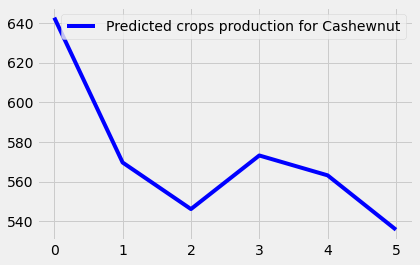

In [86]:
#plt.plot(testData, color='red',label='Real crops production')
plt.plot(predicted_stock_price2, color='blue',label='Predicted crops production for Cashewnut',)
plt.xlabel = 'Time'
plt.ylabel = 'Crops production'
plt.legend()
plt.show()

Taking banana

In [87]:
Banana = df[(df["Crop"] == "Banana")]
Banana["production"] = Banana["Production"]/10000
Banana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00,0.064100
20,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Banana,213.00,1278.00,0.127800
29,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Banana,266.00,1763.00,0.176300
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12,0.040412
47,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Banana,22.00,582.00,0.058200
...,...,...,...,...,...,...,...,...
230597,Uttar Pradesh,SULTANPUR,2014,Summer,Banana,11.00,496.00,0.049600
230814,Uttar Pradesh,UNNAO,2004,Whole Year,Banana,1.00,36.00,0.003600
230870,Uttar Pradesh,UNNAO,2006,Whole Year,Banana,1.00,39.00,0.003900
231090,Uttar Pradesh,UNNAO,2013,Summer,Banana,17.00,740.00,0.074000


In [88]:
Banana.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,production
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00,0.064100
20,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Banana,213.00,1278.00,0.127800
29,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Banana,266.00,1763.00,0.176300
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12,0.040412
47,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Banana,22.00,582.00,0.058200


In [89]:
Banana = kerala[(kerala["Crop"] == "Banana")]
Banana=Banana.reset_index()
Banana = Banana.drop(['index','District_Name','Season','Area'],axis=1)
Banana

,State_Name,Crop_Year,Crop,Production
0,Kerala,1998,Banana,4493.00
1,Kerala,1999,Banana,5418.00
2,Kerala,2000,Banana,4134.00
3,Kerala,2001,Banana,3372.00
4,Kerala,2002,Banana,3815.00
...,...,...,...,...
233,Kerala,2010,Banana,87967.67
234,Kerala,2011,Banana,107243.88
235,Kerala,2012,Banana,94955.00
236,Kerala,2013,Banana,98518.00


In [90]:
Banana_pivot = pd.pivot_table(Banana, index = 'Crop_Year')
Banana_pivot

,Production
Crop_Year,
1998,27613.428571
1999,28438.928571
2000,23425.357143
2001,26850.214286
2002,30129.214286
2003,31587.142857
2004,28257.692308
2005,28974.076923
2006,33126.142857


In [91]:
# Reshape the dataset 
ddf1 = np.array(Banana_pivot).reshape(-1 , 1)
ddf1

array([[27613.42857143],
       [28438.92857143],
       [23425.35714286],
       [26850.21428571],
       [30129.21428571],
       [31587.14285714],
       [28257.69230769],
       [28974.07692308],
       [33126.14285714],
       [31414.5       ],
       [31141.35714286],
       [29017.28571429],
       [34547.67142857],
       [36718.11357143],
       [36829.07142857],
       [37949.92857143],
       [38959.35714286]])

In [92]:
# split the data into train and test data
trainSize = int(len(ddf1)*0.67)
testSize = len(ddf1) - trainSize
trainData , testData = ddf1[0:trainSize , : ] , ddf1[trainSize : len(ddf1),:1]

In [93]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [94]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(3, 11):
    xTrain.append(trainData[i-3 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [95]:
#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [96]:
# LSTM Architecture
model = Sequential()

#first layer with Drouput Regularsation
model.add(LSTM(units=50 , return_sequences=True , input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

#Second LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units=1))

In [97]:
model.compile(optimizer = 'rmsprop' , loss='mean_squared_error')

In [98]:
#Fitting to the traing set
model.fit(xTrain , yTrain , epochs = 50 , batch_size = 5)

Epoch 1/50
2/2 [==============================] - 8s 17ms/step - loss: 0.5122
Epoch 2/50
2/2 [==============================] - 0s 13ms/step - loss: 0.4489
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 0.3736
Epoch 4/50
2/2 [==============================] - 0s 16ms/step - loss: 0.2780
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 0.1826
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0950
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0606
Epoch 8/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0532
Epoch 9/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0600
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0675
Epoch 11/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0529
Epoch 12/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0447
Epoch 13/50
2/2 [==============================] - 0s 15ms/st

In [99]:
dataset_total = (Banana["Production"])
inputs = dataset_total[len(dataset_total)-len(testData) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]

array([[0.54342392],
       [0.59965414],
       [0.        ],
       [0.15209775],
       [0.54110686]])

In [100]:
inputs

array([[0.54342392],
       [0.59965414],
       [0.        ],
       [0.15209775],
       [0.54110686],
       [1.        ],
       [0.70744858],
       [0.79227003],
       [0.83431177]])

In [101]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(3, 9):
    xTest.append(inputs[i-3 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)
#testData2 = scaler.inverse_transform(testData)

In [102]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

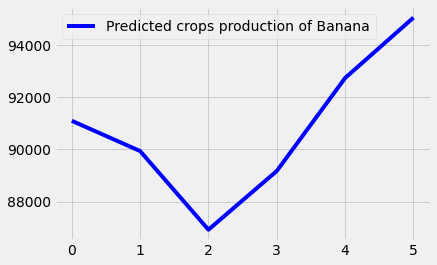

In [103]:
#plt.plot(testData, color='red',label='Real crops production')
plt.plot(predicted_stock_price2, color='blue',label='Predicted crops production of Banana',)
plt.xlabel = 'Time'
plt.ylabel = 'Crops production'
plt.legend()
plt.show()

*Conclusion*: Analysis showed that Bananas and Rice will have more yield in kerala in the coming year. The production will be reduced for the Cashewnut in kerala in the coming years.
